In [143]:
import os
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [74]:
nlp = spacy.load('fr_core_news_lg')

In [2]:
path = "../../../L3/S2/stage/"

In [116]:
corpus = {}
femmes = []
hommes = []

for filename in os.listdir(path+"corpus_femmes") :
    with open(f"{path}corpus_femmes/{filename}", mode="r", encoding="UTF-8") as file :
        [noun,title] = filename.split("___")
        femmes.append(noun)
        corpus[noun] = file.read()
        
for filename in os.listdir(path+"corpus_hommes") :
    with open(f"{path}corpus_hommes/{filename}", mode="r", encoding="UTF-8") as file :
        [noun,title] = filename.split("___")
        hommes.append(noun)
        corpus[noun] = file.read()
        

In [ ]:
def get_freq_matrix(train):
    vectorizer = CountVectorizer(analyzer='word')
    matrix = vectorizer.fit_transform(train)
    tokens = vectorizer.get_feature_names_out()
    return matrix, tokens

In [118]:
matrix, vocab = get_freq_matrix(corpus.values())
matrix_femmes = matrix[:len(femmes)]
matrix_hommes = matrix[len(femmes):]

In [153]:
#TO DO : parcourir le vocabulaire pour reprérer les champs lexicaux (permet de sauter l'étape de lemmatization)
for word in vocab:
    print(word)

00
000
002
008
013
022
05
086
10
100
1000
103
104
105
106
1066
107
1084
109
11
110
1103
111
112
113
115
1179
12
120
123
124
125
127
129
13
130
1314
1316
132
1322
133
134
1389
139
14
143
1460
1477
15
150
1500
1520
1547
155
156
1564
157
1570
1572
158
1597
15e
16
160
1600
1606
1610
1615
1625
1629
1633
1634
1636
1637
1638
1639
1640
1641
1642
1644
1646
1648
1649
1653
1657
166
1668
1671
1672
1673
1674
1675
1676
1679
1680
1682
17
1702
1727
1729
1740
1746
1754
176
1766
1767
1770
1775
1778
178
1780
1783
1786
1787
1789
1790
1791
1792
1793
1794
1797
1798
1799
17e
18
180
1800
1801
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1826
1827
1829
1830
1831
1832
1833
1834
1835
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
186
1860
1862
1863
1864
1865
1866
1867
1869
1870
1871
1874
1876
1877
1880
1882
1884
1885
1887
1891
1892
1895
19
1904
1907
191
1911
1912
1913
1914
1915
191

In [120]:
general_count_femmes = np.sum(matrix_femmes.toarray(),axis=0)
general_count_hommes = np.sum(matrix_hommes.toarray(),axis=0)

n_word_femmes = sum(general_count_femmes)
n_word_hommes = sum(general_count_hommes)

In [121]:
classement_femmes = sorted(zip(vocab,general_count_femmes), key=lambda item:item[1], reverse=True)
classement_hommes = sorted(zip(vocab,general_count_hommes), key=lambda item:item[1], reverse=True)

dict_femmes = dict(classement_femmes)
dict_hommes = dict(classement_hommes)

In [122]:
racines = {
    "tristesse" : [
        "triste", "tristesse", "tristes", "tristement", 
        "attristé", "attristée", "attristés", "attristées"
        ],
    "peine" : [
        "peine", "peiné", "peines"
        ],
    "chagin" : [
        "chagrin", "chagriné", "chagrinée", 
        "chagrine","chagriner"
        ]
}

In [123]:
racine2freq_femmes = {}
racine2freq_hommes = {}

for racine in racines :
    for word in racines[racine]:
        racine2freq_femmes[racine] = racine2freq_femmes.get(racine,0)+dict_femmes[word]
        racine2freq_hommes[racine] = racine2freq_hommes.get(racine,0)+dict_hommes[word]

In [125]:
print(racine2freq_femmes)
print(racine2freq_hommes)

{'tristesse': 848, 'peine': 1115, 'chagin': 204}
{'tristesse': 772, 'peine': 1360, 'chagin': 247}


In [159]:
word = "chagrin"

In [160]:
freq_femmes = [dict(sorted(zip(vocab,vector), key = lambda x : x[1], reverse=True)) for vector in matrix_femmes.toarray()]
freq_hommes = [dict(sorted(zip(vocab,vector), key = lambda x : x[1], reverse=True)) for vector in matrix_hommes.toarray()]
count_femmes = [frequences[word] for frequences in freq_femmes]
count_hommes = [frequences[word] for frequences in freq_hommes]

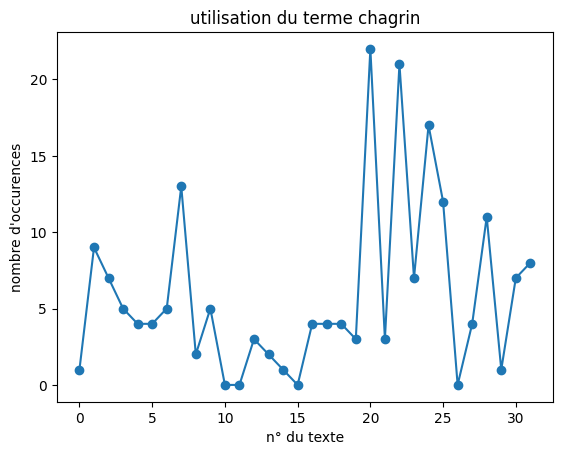

In [161]:
x = range(len(count_femmes))  # Generate x-axis values as indices of the data list

plt.plot(x, count_femmes, marker='o')  # Create a line graph with markers
plt.xlabel('n° du texte')
plt.ylabel("nombre d'occurences")
plt.title(f'utilisation du terme {word}')

plt.show()  # Display the graph

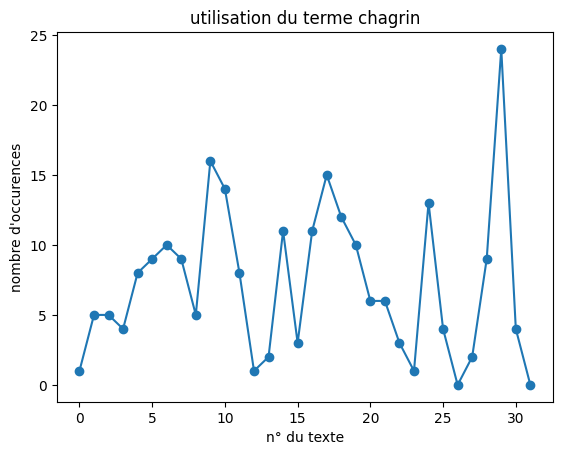

In [162]:
x = range(len(count_hommes))  # Generate x-axis values as indices of the data list

plt.plot(x, count_hommes, marker='o')  # Create a line graph with markers
plt.xlabel('n° du texte')
plt.ylabel("nombre d'occurences")
plt.title(f'utilisation du terme {word}')

plt.show()  # Display the graph